## HDP-HMM ELBO objective

In our recent manuscript, we see that the HDP-HMM objective has the following term:

\begin{align}
\mathcal{L}_{\mbox{hdp-local}}(s, \theta, \rho, \omega) 
&\triangleq 
\mathbb{E}[ c_D(\alpha_0 \beta ) ]
+ \sum_{k=1}^K \mathbb{E}[ c_D(\alpha \beta + \kappa \delta_k ]
\\
& - \sum_{k=0}^K c_D(\theta_k)
\\
& + \sum_{k=0}^K \sum_{\ell=1}^{K+1}
( 
M_{k\ell}
+ \alpha_{k} 
\mathbb{E}_{q(u)}[\beta_{\ell}]
+  \kappa \delta_k(\ell)
-  \theta_{k\ell}
) P_{k\ell}
\end{align}

where we defined $M_{k\ell}$ as a count sufficient statistic, and $P_{k\ell}$ as a log probability statistic.

\begin{align}
M_{k\ell} &\triangleq \mathbb{E}[ \sum_{n} \sum_{t} z_{ntk} z_{n,t+1,\ell} ] = \sum_{n=1}^N \sum_{t=1}^{T_n-1} s_{ntk\ell}
\\
P_{k\ell} &\triangleq \mathbb{E}[ \log \pi_{k\ell} ] = \psi(\theta_{k\ell}) - \psi(\theta_{k\cdot} )
\end{align}

The last term of $\mathcal{L}_{\mbox{hdp-local}}$, involving $M$, and $P$, is called the **slack** term. Immediately after a global update, this term is precisely equal to zero, since $\theta_{k\ell}$ is set equal to $M_{k\ell} + \alpha + \kappa$.

## Slack term: memoized vs. stochastic evaluation

When performing memoized variational inference, we always evaluate the ELBO immediately after a global step. Thus, the slack term will be zero, as described above, since the global update sets $\theta_{k\ell} = M_{k\ell} + \alpha + \kappa$.

For stochastic inference, the slack term is never exactly zero, since the update to $\theta_{k\ell}$ uses a learning rate. However, after many iterations the slack term will likely be *almost* zero.

## What this notebook shows

That across multiple runs of both stochastic and memoized, the ELBO computation leads to reasonable values.

In [18]:
import bnpy

In [19]:
%pylab inline
bnpy.viz.PlotUtil.ConfigPylabDefaults(pylab)

Populating the interactive namespace from numpy and matplotlib


## Create a toy dataset of 2 sequences, of **different** lengths

In [10]:
import SeqOfBinBars9x9

In [11]:
Data = SeqOfBinBars9x9.get_data(nDocTotal=2, T='100,300')

## Sequence 1/2: 100 timesteps long

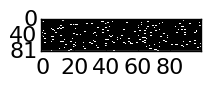

In [12]:
pylab.figure(figsize=(2,1))
pylab.imshow(Data.X[:Data.doc_range[1]].T, aspect=0.25, cmap='bone', interpolation='nearest');
pylab.yticks([0,40,81]);

## Sequence 2/2: 300 timesteps long

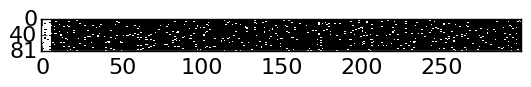

In [13]:
pylab.figure(figsize=(6,1))
pylab.imshow(Data.X[Data.doc_range[1]:Data.doc_range[2]].T, aspect=0.25, cmap='bone', interpolation='nearest');
pylab.yticks([0,40,81]);

## Run memoized, as a baseline

In [20]:
bnpy.run(Data, 'HDPHMM', 'Bern', 'moVB', nLap=100, minLap=30, printEvery=100, 
        K=5, initname='randexamples',
        nTask=10,
        jobname='test-model=HDPHMM-alg=memo');

Binary Bar Sequences with 20 true topics.
Entire Dataset Summary:
  total size: 2 units
  batch size: 1 units
  num. batches: 2
Data for Initialization:
  size: 2 units (documents)
  dimension: 81
Allocation Model:  None
Obs. Data  Model:  Bernoulli over 81 binary attributes.
Obs. Data  Prior:  Beta over 81 attributes.
  lam1 = [ 0.1  0.1] ...
  lam0 = [ 0.1  0.1] ...
  
Learn Alg: moVB
Trial  1/10 | alg. seed: 8204544 | data order seed: 8541952
savepath: /results/SeqOfBinBars9x9/test-model=HDPHMM-alg=memo/1
    0.500/100 after      0 sec. | K    5 | ev -2.592987794e-01 |  
        1/100 after      0 sec. | K    5 | ev -2.555258144e-01 |  
    1.500/100 after      0 sec. | K    5 | ev -2.553482239e-01 | Ndiff    0.489 
   30.000/100 after      1 sec. | K    5 | ev -2.485689323e-01 | Ndiff    0.000 
... done. converged.
Trial  2/10 | alg. seed: 9353472 | data order seed: 7673856
savepath: /results/SeqOfBinBars9x9/test-model=HDPHMM-alg=memo/2
    0.500/100 after      0 sec. | K    5 | ev

### Run stochastic WITH slack

This run is from same initialization as before, doing stochastic updates. 

The ELBO we track along the way does NOT include the slack term.

In [22]:
bnpy.run(Data, 'HDPHMM', 'Bern', 'soVB', nLap=100, printEvery=100, 
        K=5, initname='randexamples',
        useSlackTermsInELBO=1,
        nTask=10,
        jobname='test-model=HDPHMM-alg=stochWithSlack');

Binary Bar Sequences with 20 true topics.
Entire Dataset Summary:
  total size: 2 units
  batch size: 1 units
  num. batches: 2
Data for Initialization:
  size: 2 units (documents)
  dimension: 81
Allocation Model:  None
Obs. Data  Model:  Bernoulli over 81 binary attributes.
Obs. Data  Prior:  Beta over 81 attributes.
  lam1 = [ 0.1  0.1] ...
  lam0 = [ 0.1  0.1] ...
  
Learn Alg: soVB
Trial  1/10 | alg. seed: 8204544 | data order seed: 8541952
savepath: /results/SeqOfBinBars9x9/test-model=HDPHMM-alg=stochWithSlack/1
    0.500/100 after      0 sec. | K    5 | ev -2.645995288e-01 |  lrate 0.7071
        1/100 after      0 sec. | K    5 | ev -2.567213745e-01 |  lrate 0.5774
    1.500/100 after      0 sec. | K    5 | ev -2.582314233e-01 |  lrate 0.5000
  100.000/100 after      3 sec. | K    5 | ev -2.453563606e-01 |  lrate 0.0705
... active. not converged.
Trial  2/10 | alg. seed: 9353472 | data order seed: 7673856
savepath: /results/SeqOfBinBars9x9/test-model=HDPHMM-alg=stochWithSlack/2

## Plot: Training objective as more data is seen

Across several initializations, we see that the stochastic and memoized reach similar sets of fixed points.

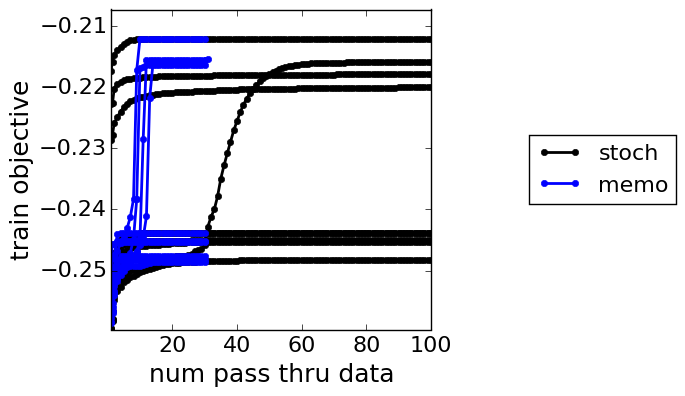

In [30]:
jobList = ['SeqOfBinBars9x9/test-model=HDPHMM-alg=stochWithSlack',
           'SeqOfBinBars9x9/test-model=HDPHMM-alg=memo']
bnpy.viz.PlotELBO.plotJobs(jobList, ['stoch', 'memo'],
                           loc='center right', bbox_to_anchor=(1.8, 0.5));
pylab.xlim([1, 100]);